In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score,\
precision_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import Pipeline

# from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_precision_recall_curve
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_app = pd.read_csv('AppleStore.csv')
df_description = pd.read_csv('appleStore_description.csv')

## Content
### appleStore.csv
1. "id" : App ID
2. "track_name": App Name
3. "size_bytes": Size (in Bytes)
4. "currency": Currency Type
5. "price": Price amount
6. "ratingcounttot": User Rating counts (for all version)
7. "ratingcountver": User Rating counts (for current version)
8. "user_rating" : Average User Rating value (for all version)
9. "userratingver": Average User Rating value (for current version)
10. "ver" : Latest version code
11. "cont_rating": Content Rating (Age)
12. "prime_genre": Primary Genre
13. "sup_devices.num": Number of supporting devices
14. "ipadSc_urls.num": Number of screenshots showed for display
15. "lang.num": Number of supported languages
16. "vpp_lic": Vpp Device Based Licensing Enabled (Can be bought by organisations in bulk)

### appleStore_description.csv
1. id : App ID
2. track_name: Application name
3. size_bytes: Memory size (in Bytes)
4. app_desc: Application description

In [3]:
df_app_html = df_app[:10].to_html()
#print(df_app_html)

In [4]:
df_description_html = df_description[:10].to_html()
#print(df_description_html)

## Read Dataset

In [5]:
df_app.isna().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [6]:
df_description.isna().sum()

id            0
track_name    0
size_bytes    0
app_desc      0
dtype: int64

- There aren't null values in the dataset

In [7]:
df_app.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


- Delete Unnamed: 0 columns

In [8]:
df_app = df_app.iloc[:, 1:]

In [9]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [10]:
df_description.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [11]:
df_app.shape

(7197, 16)

In [12]:
df_description.shape

(7197, 4)

- Both datasets have the same number of rows, therefore we can merge the dataset

## Merge Dataset

In [13]:
df_app['app_desc'] = df_description['app_desc']

In [14]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


- Change the unit size into megabytes for convinience

In [15]:
df_app['size_bytes_in_MB'] = df_app['size_bytes'] / (1024 * 1024.0)

In [16]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562


## isNotFree

In [17]:
df_app['isNotFree'] = df_app['price'].apply(lambda x : 1 if x > 0 else 0)

In [18]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562,0


### Assumption
1. An app is considered successful if the user rating is more or equal to 4.
2. Success will be our target.

In [19]:
df_app['success'] = df_app['user_rating'].apply(lambda x : 1 if x >= 4 else 0)

In [20]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree,success
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141,1,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422,0,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188,0,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594,0,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562,0,1


# EDA
1. How does app details contribute to user ratings?
2. Try to compare statistics for different groups!
3. What should a company do to boost user ratings by looking at app details?

In [21]:
df_app['cont_rating'].value_counts()

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

Apple's rating system for the App Store follows the following rubric:

- Rated 4+: Contains no objectionable material.
- Rated 9+: May contain content unsuitable for children under the age of 9.
- Rated 12+: May contain content unsuitable for children under the age of 12.
- Rated 17+: May contain content unsuitable for children under the age of 17.

Apps rated 17+ are prohibited from purchase by younger users.

https://en.wikipedia.org/wiki/Mobile_software_content_rating_system

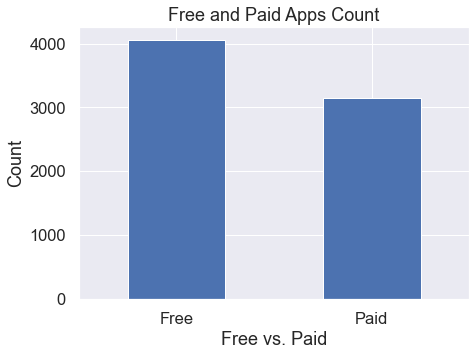

In [22]:
plt.figure(figsize=(7, 5))
df_app['isNotFree'].value_counts().plot.bar()
plt.xlabel('Free vs. Paid')
plt.ylabel('Count')
x_isNotFree = [0,1]
squad = ['Free','Paid']
plt.xticks(x_isNotFree, squad, rotation=0)
plt.title("Free and Paid Apps Count")
plt.show()

In [23]:
df_app_notfree = df_app[df_app['isNotFree'] == 1]
df_app_free = df_app[df_app['isNotFree'] == 0]

In [24]:
print('There are {} Not-Free Apps in this dataset'.format(df_app_notfree.shape[0]))
print('There are {} Free Apps in this dataset'.format(df_app_free.shape[0]))

There are 3141 Not-Free Apps in this dataset
There are 4056 Free Apps in this dataset


- 44% are paid apps (3141 apps)
- 56% are free apps (4056 apps)

## Countplot for each type of prime_genre

Text(0.5, 1.0, 'Prime Genre Count')

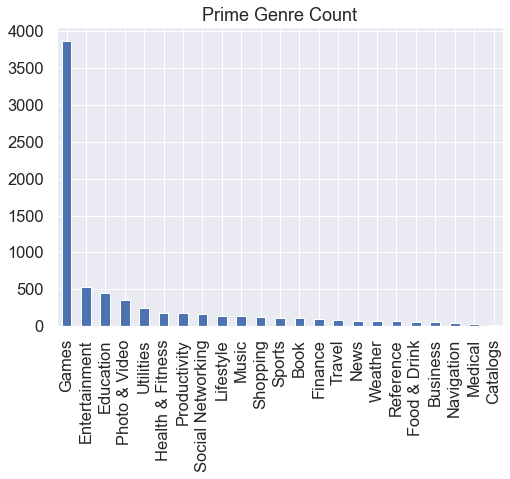

In [25]:
df_app['prime_genre'].value_counts().plot.bar()
plt.title("Prime Genre Count")

- Games are the most numerous followed by Entertainment, Education and Photo & Video

### Countplot for each type of prime_genre (Free vs. Not Free)

Text(0.5, 1.0, 'Prime Genre Count (Paid Apps)')

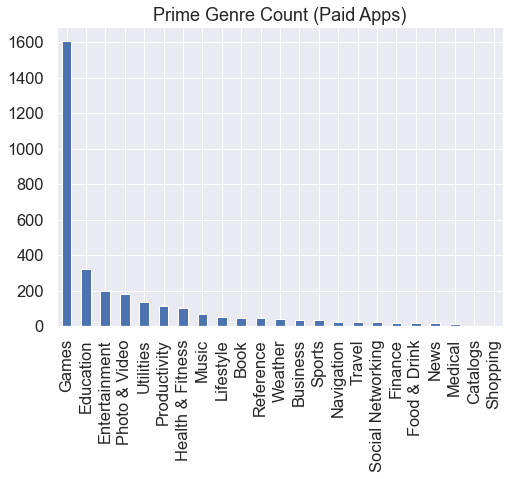

In [26]:
df_app_notfree['prime_genre'].value_counts().plot.bar()
plt.title("Prime Genre Count (Paid Apps)")

- Games are the most numerous paid apps followed by Education, Entertainment, and Photo & Video

Text(0.5, 1.0, 'Prime Genre Count (Free Apps)')

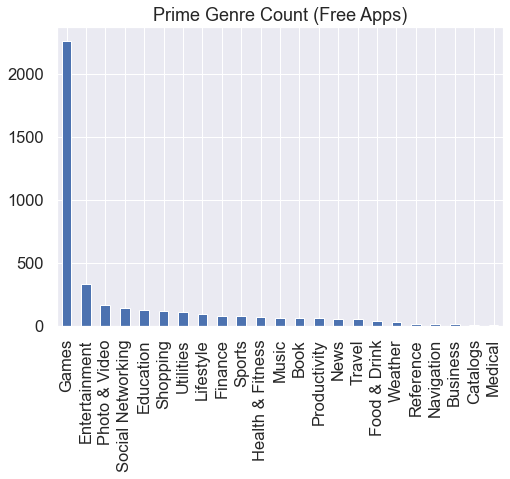

In [27]:
df_app_free['prime_genre'].value_counts().plot.bar()
plt.title("Prime Genre Count (Free Apps)")

- Games are the most numerous free apps, followed by Entertainment, Photo & Video, and Social Networking

In [28]:
df_app["prime_genre"].value_counts()[:5]

Games            3862
Entertainment     535
Education         453
Photo & Video     349
Utilities         248
Name: prime_genre, dtype: int64

Text(0.5, 1.0, 'Prime Genre Count (Free and Paid Apps)')

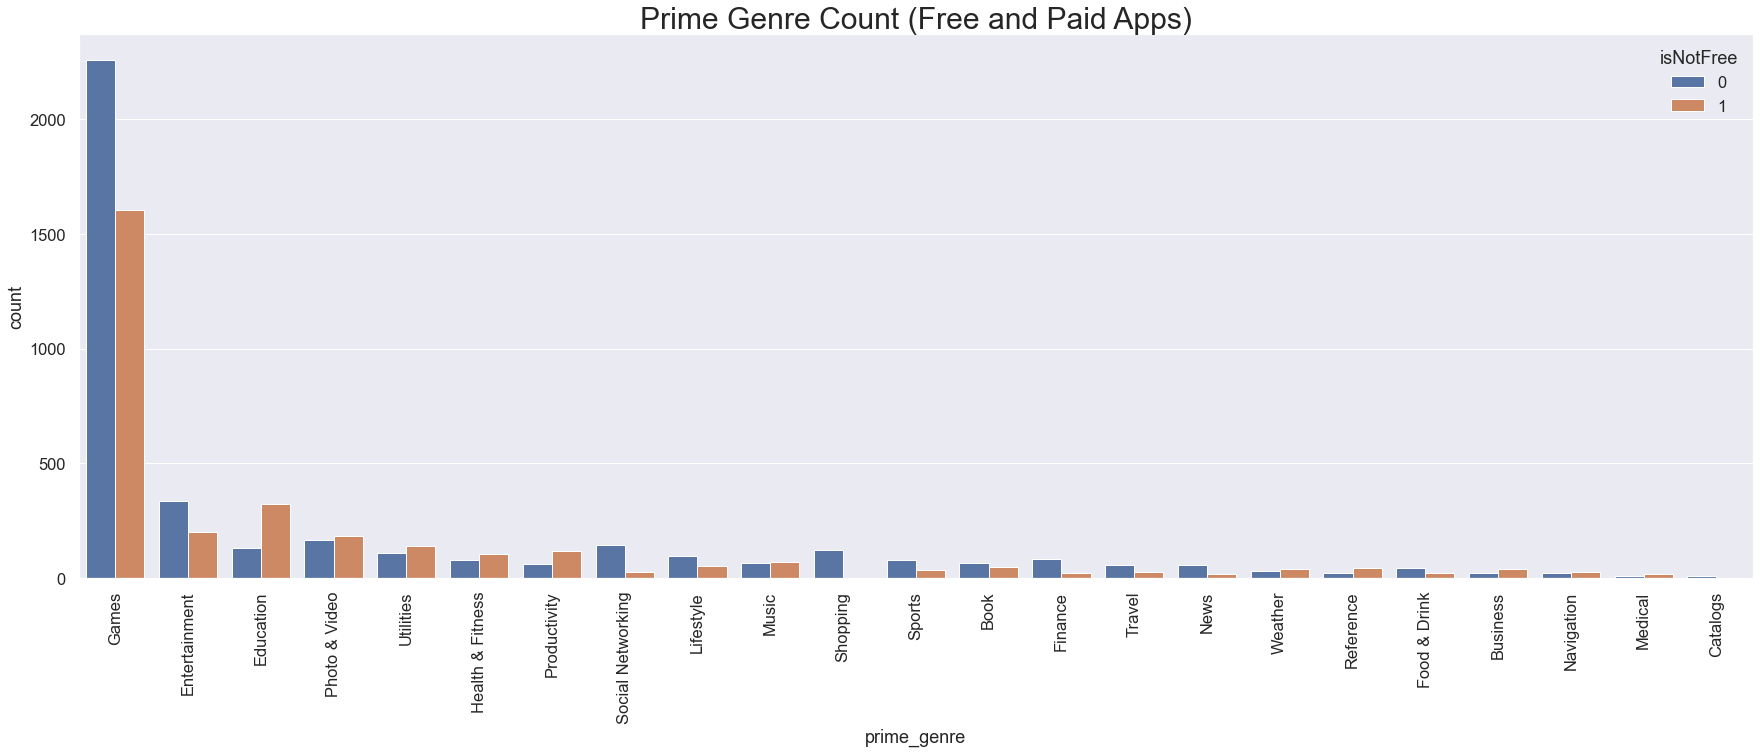

In [29]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.countplot(x="prime_genre", hue="isNotFree", data=df_app, order=df_app["prime_genre"].value_counts().index)
plt.title("Prime Genre Count (Free and Paid Apps)", size=30)

- Games, Entertainment, Education, Photo & Video, and Utilities are the top 5 numerous app categories on the app store
- Most shopping, Social Networking, Games and Entertainment apps are free
- Most Education and Productivity apps are paid apps
- Roughly half of Photo & Video, Utilities and Health & Fitness apps are paid

## Paid Shopping App

In [30]:
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Shopping')]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree,success
263,340779800,The Christmas List,26137600,USD,1.99,2722,1,4.5,5.0,2.1,4+,Shopping,37,0,1,1,The #1 Shopping App in the US – The Christmas ...,24.926758,1,1


## Free Shopping App

In [31]:
for app in df_app.loc[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping'), 'track_name'].values:
    print(app)

eBay: Best App to Buy, Sell, Save! Online Shopping
Target
Amazon App: shop, scan, compare, and read reviews
Best Buy
Whole Foods Market
Gilt
Walgreens – Pharmacy, Photo, Coupons and Shopping
Kmart – Download Now, Shop Online & Pick Up Today!
Victoria’s Secret – The Sexiest Bras & Lingerie
Walmart: Free 2-Day Shipping,* Easy Store Shopping
Shop Savvy Barcode Scanner - Price Compare & Deals
Macy's
Groupon - Deals, Coupons & Discount Shopping App
ヤフオク! 利用者数NO.1のオークション、フリマアプリ
Apple Store
Vestiaire Collective - Pre-Owned Luxury Fashion
Sam's Club: Wholesale Shopping & Bulk Buy Deals
eBay Kleinanzeigen - Free. Easy. Local.
shopkick - Shopping Rewards & Discounts
淘宝 - 随时随地，想淘就淘
Zappos: shop shoes & clothes, fast free shipping
Sephora Makeup & Beauty App – Insider Tips & Style
CVS Pharmacy
Black Friday 2017 Ads App - BlackFriday.fm
ファッション通販 ZOZOTOWN
手机京东-首次购买可领取188元优惠券
唯品会-欢乐颂2独家电商 同款热卖
苏宁易购-新人专享大礼包
Showroomprive - Private Fashion Sales
1号店-全球超市 轻松到家
美丽说-潮流穿搭快人一步
京东 HD
AliExpress Shopping App


In [32]:
for app in df_app.loc[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping'), 'user_rating'].values:
    print(app)

4.0
3.0
3.5
4.0
3.0
3.5
4.5
3.5
3.5
3.0
2.5
3.5
4.5
3.0
3.5
4.0
4.0
4.5
4.5
4.0
5.0
4.5
4.0
4.5
0.0
3.5
4.5
3.0
4.0
3.5
4.5
4.0
4.0
3.5
3.0
5.0
5.0
4.0
4.0
4.5
4.5
4.0
4.5
0.0
4.0
4.0
4.5
4.5
4.5
4.5
4.0
4.5
4.5
5.0
4.5
0.0
3.0
4.0
4.5
4.5
5.0
4.0
0.0
3.0
4.0
4.5
0.0
2.5
4.5
4.5
3.5
4.5
4.5
4.0
5.0
4.5
4.0
4.5
5.0
3.5
3.5
4.5
4.0
0.0
2.5
4.0
4.5
0.0
0.0
4.5
0.0
3.5
3.0
4.5
4.5
0.0
3.0
4.5
4.5
4.5
3.5
4.5
5.0
2.5
4.5
2.5
4.5
5.0
0.0
4.0
5.0
4.5
5.0
5.0
4.0
0.0
0.0
0.0
4.5
0.0
0.0


### Mean user rating of free shopping app

In [33]:
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping')]['user_rating'].mean()

3.5330578512396693

## Free Social Media App

In [34]:
for app in df_app.loc[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Social Networking'), 'track_name'].values:
    print(app)

Facebook
LinkedIn
Skype for iPhone
Tumblr
Match™ - #1 Dating App.
WhatsApp Messenger
TextNow - Unlimited Text + Calls
Grindr - Gay and same sex guys chat, meet and date
imo video calls and chat
Ameba
Weibo
Badoo - Meet New People, Chat, Socialize.
Kik
Qzone
Fake-A-Location Free ™
Tango - Free Video Call, Voice and Chat
MeetMe - Chat and Meet New People
SimSimi
Viber Messenger – Text & Call
Find My Family, Friends & iPhone - Life360 Locator
Weibo HD
POF - Best Dating App for Conversations
GroupMe
出会い系アプリ i-Mail（アイメール）
Lobi
WeChat
YY- 小全民手机直播交友软件
ooVoo – Free Video Call, Text and Voice
Pinterest
知乎
Qzone HD
Skype for iPad
LINE
QQ
LOVOO - Dating Chat
MOMO陌陌-开启视频社交,用直播分享生活
QQ HD
Messenger
eHarmony™ Dating App - Meet Singles
YouNow: Live Stream Video Chat
Cougar Dating & Life Style App for Mature Women
百度贴吧-全球最大兴趣交友社区
Battlefield™ Companion
Whisper - Share, Express, Meet
same - 就是聊得来
We Heart It - Fashion, wallpapers, quotes, tattoos
Followers - Social Analytics For Instagram
Jメール 出会える人気の匿名

## Paid Social Media Apps

In [35]:
for app in df_app.loc[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Social Networking'), 'track_name'].values:
    print(app)

Bowitter for iPhone
Badoo Premium - Meet new people. Extra features.
Fake Location
Who Deleted Me? for Facebook
TeamSpeak 3
Threema
Followers + EA - Analytics for Instagram
VVebo - 微博客户端
feather for Twitter
Repost It! for Instagram Pro - Video Photo Whiz
InsSave - Download & Save Photos & Videos From Instagram With Ease!
Love Msg
Remove Caption for Snapchat* Screenshots
WeicoPro 4
一言-记录字句，发现共鸣
Tweetbot 4 for Twitter
狼人之夜
InsPad - Instagram for iPad
ChatMate for WhatsApp
Todrick
Littlebook - for Facebook on Watch
求恋爱 专业版-高端恋爱相亲婚恋交友神器,同城寂寞单身男女聊天约会找对象平台
Not Karlton Banks Emojis by Eboticons
Demi Lovato Stickers


## Free Music Apps

In [36]:
for app in df_app.loc[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Music'), 'track_name'].values:
    print(app)

Pandora - Music & Radio
Shazam - Discover music, artists, videos & lyrics
iHeartRadio – Free Music & Radio Stations
Deezer - Listen to your Favorite Music & Playlists
Sonos Controller
NRJ Radio
radio.de - Der Radioplayer
Spotify Music
SoundCloud - Music & Audio
Sing Karaoke Songs Unlimited with StarMaker
SoundHound Song Search & Music Player
Ringtones for iPhone & Ringtone Maker
Coach Guitar - Lessons & Easy Tabs For Beginners
QQ音乐-来这里“发现・音乐”
TuneIn Radio - MLB NBA Audiobooks Podcasts Music
Magic Piano by Smule
QQ音乐HD
The Singing Machine Mobile Karaoke App
Bandsintown Concerts
PetitLyrics
edjing Mix:DJ turntable to remix and scratch music
Smule Sing!
Amazon Music
AutoRap by Smule
My Mixtapez Music
Certified Mixtapes - Hip Hop Albums & Mixtapes
Karaoke - Sing Karaoke, Unlimited Songs!
Napster - Top Music & Radio
Musi - Unlimited Music For YouTube
UE BOOM
Spinrilla - Mixtapes For Free
Google Play Music
Piano - Play Keyboard Music Games with Magic Tiles
Bose SoundTouch
DatPiff
Sounds app 

## Paid Music Apps

In [37]:
for app in df_app.loc[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Music'), 'track_name'].values:
    print(app)

Cleartune - Chromatic Tuner
TouchOSC
iReal Pro - Music Book & Play Along
Tempo - Metronome with Setlists
I Am T-Pain 2.0
TuneIn Radio Pro - MLB Audiobooks Podcasts Music
Shazam Encore
Tabs & Chords by Ultimate Guitar - learn and play
forScore
Ringtone Designer Pro - Create Unlimited Ringtones, Text Tones, Email Alerts, and More!
Guitar Pro
FL Studio Mobile
Tenuto
Drum Beats+ (Rhythm Metronome, Loops & Grooves Machine)
Loopy HD
Notion
TonalEnergy Chromatic Tuner and Metronome
Guitar Suite - Metronome, Tuner, and Chords Library for Guitar, Bass, Ukulele
OnSong
Magellan
Real Metronome Pro
UBiO
Cubasis 2 - Mobile Music Creation System
Galileo Organ
LiveTunes - Live Concert Music Player
djay 2
djay 2 for iPhone
TunesFlow - Music Player with Equalizer
Pimp Your Sound
Serato Remote Mini
KORG Gadget
Drillbook Next Reader
MuseScore Songbook - Sheet Music
Disney Karaoke: Frozen
Touch Notation
Pyware 3D Viewer
VOX: FLAC Music Player with MP3 & Equalizer
Cesium Music Player
KORG Module
SOUND Canva

## Prime genre vs. User Rating

In [38]:
df_group_genre_vs_rating = df_app[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
df_genre_vs_rating = df_group_genre_vs_rating.reset_index()

In [39]:
df_genre_vs_rating

,prime_genre,user_rating
0,Productivity,4.005618
1,Music,3.978261
2,Photo & Video,3.800860
3,Business,3.745614
4,Health & Fitness,3.700000
5,Games,3.685008
6,Weather,3.597222
7,Shopping,3.540984
8,Reference,3.453125
9,Travel,3.376543


Text(0.5, 1.0, 'Prime Genre vs. User Rating')

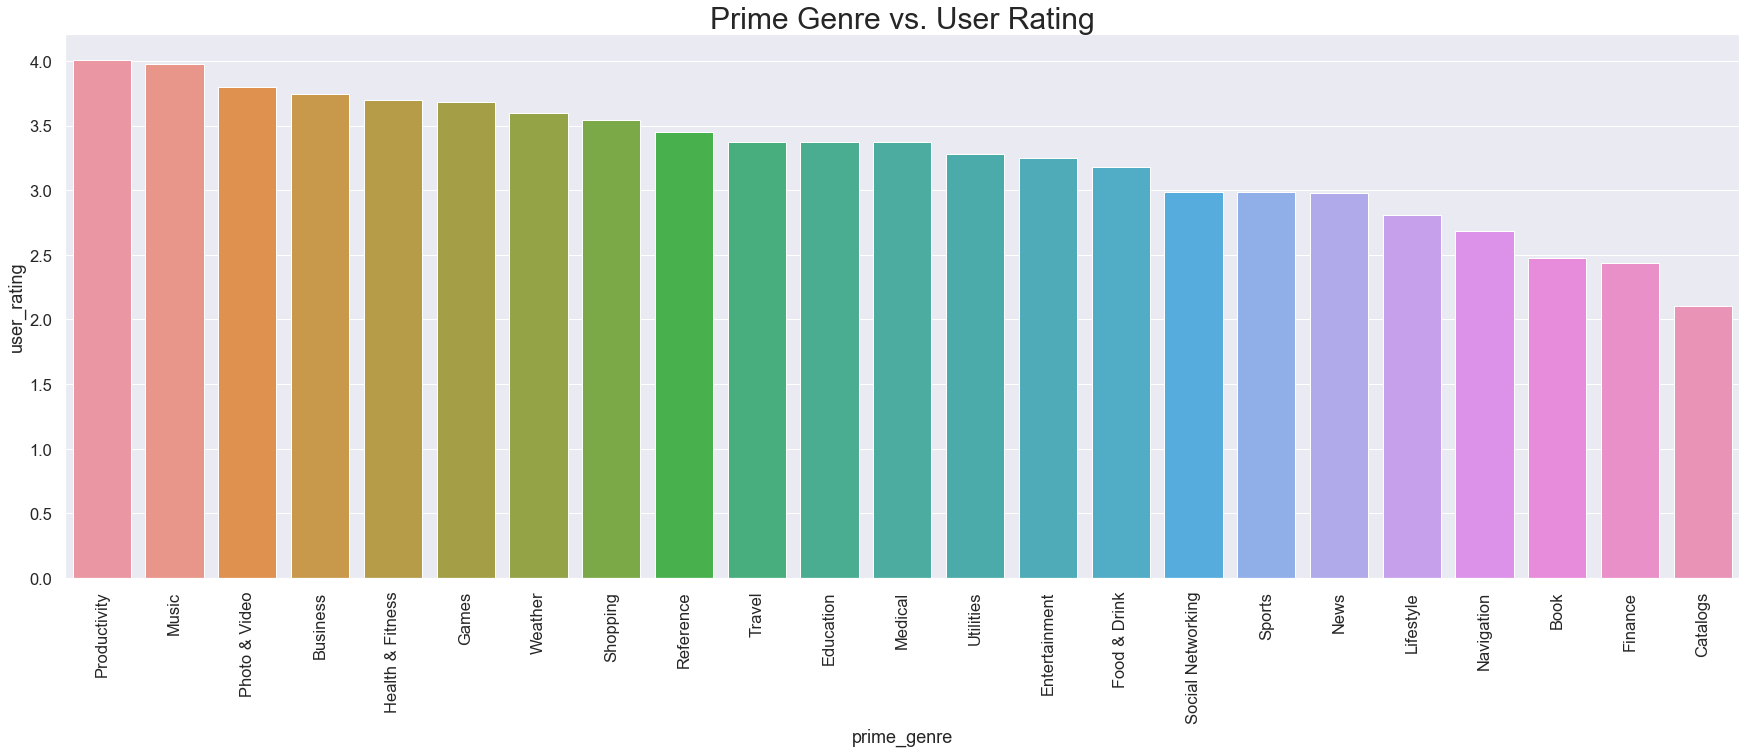

In [40]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x="prime_genre", y="user_rating", data=df_genre_vs_rating)
plt.title("Prime Genre vs. User Rating", size=30)

### Top 10 Rating Grouped by Genre

1. Productivity
2. Music
3. Photo & Video
4. Business
5. Health & Fitness
6. Games
7. Weather
8. Shopping
9. Reference
10. Travel

In [41]:
df_genre_vs_rating[df_genre_vs_rating['user_rating'] > 3.5]

,prime_genre,user_rating
0,Productivity,4.005618
1,Music,3.978261
2,Photo & Video,3.800860
3,Business,3.745614
4,Health & Fitness,3.700000
5,Games,3.685008
6,Weather,3.597222
7,Shopping,3.540984


In [42]:
df_group_genre_vs_rating_free = df_app_free[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
df_genre_vs_rating_free = df_group_genre_vs_rating_free.reset_index()

In [43]:
df_genre_vs_rating_free.head()

,prime_genre,user_rating
0,Productivity,3.959677
1,Music,3.940299
2,Photo & Video,3.793413
3,Health & Fitness,3.578947
4,Shopping,3.533058


### Top 5 Free Apps Grouped by Genre
1. Productivity
2. Music
3. Photo & Video
4. Health & Fitness
5. Shopping

Text(0.5, 1.0, 'Prime Genre vs. User Rating (Free Apps)')

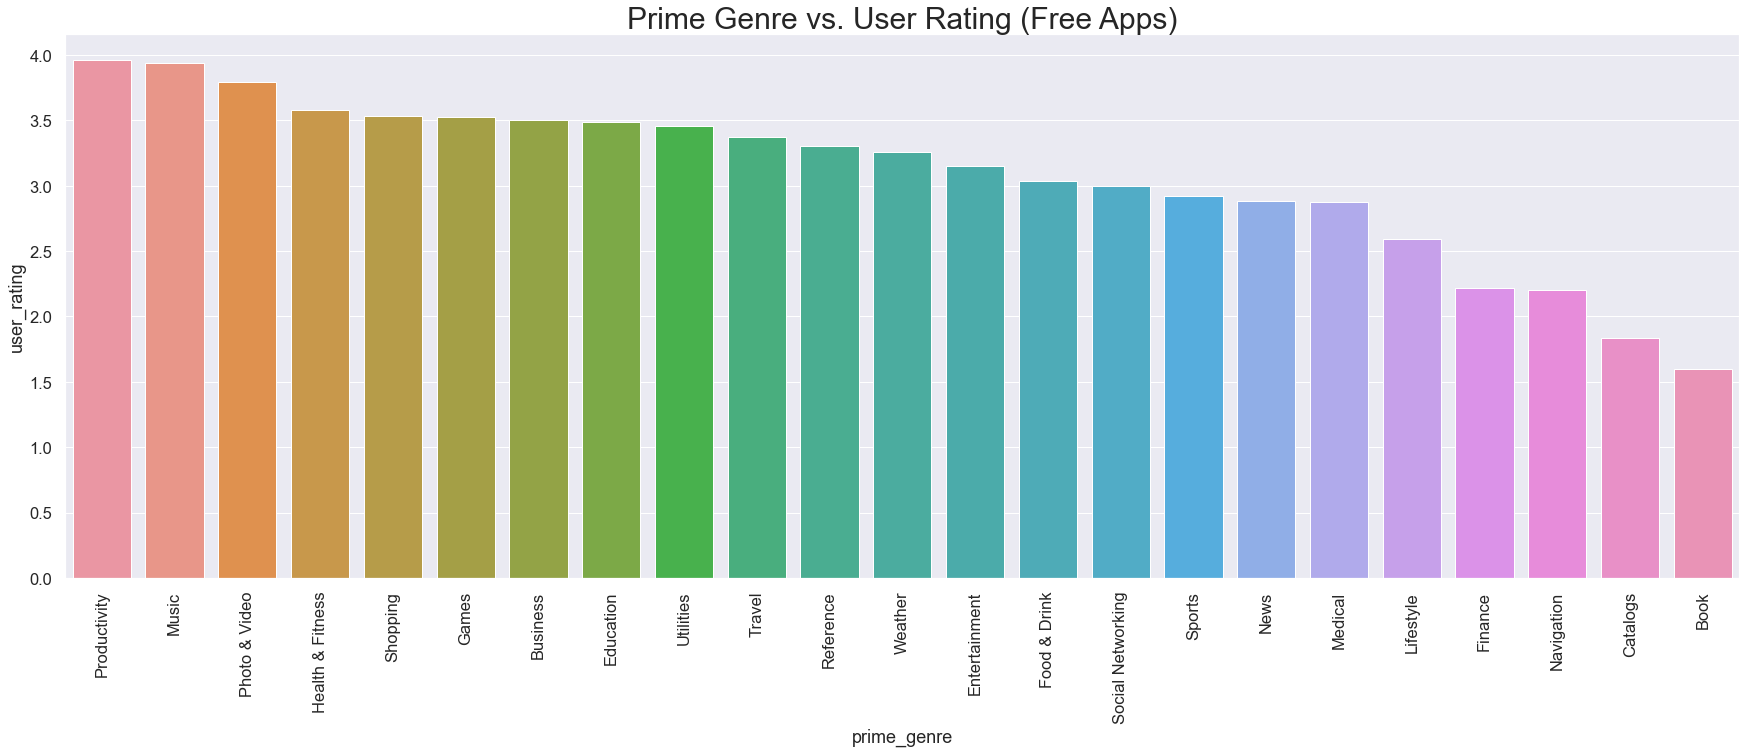

In [44]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x="prime_genre", y="user_rating", data=df_genre_vs_rating_free)
plt.title("Prime Genre vs. User Rating (Free Apps)", size=30)

In [45]:
df_group_genre_vs_rating_notfree = df_app_notfree[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
df_genre_vs_rating_notfree = df_group_genre_vs_rating_notfree.reset_index()

In [46]:
df_genre_vs_rating_notfree.head()

,prime_genre,user_rating
0,Catalogs,4.500000
1,Shopping,4.500000
2,Productivity,4.030172
3,Music,4.014085
4,Games,3.904984


### Top 5 Paid Apps Grouped by Genre
1. Catalogs
2. Shopping
3. Productivity
4. Music
5. Games

Text(0.5, 1.0, 'Prime Genre vs. User Rating (Paid Apps)')

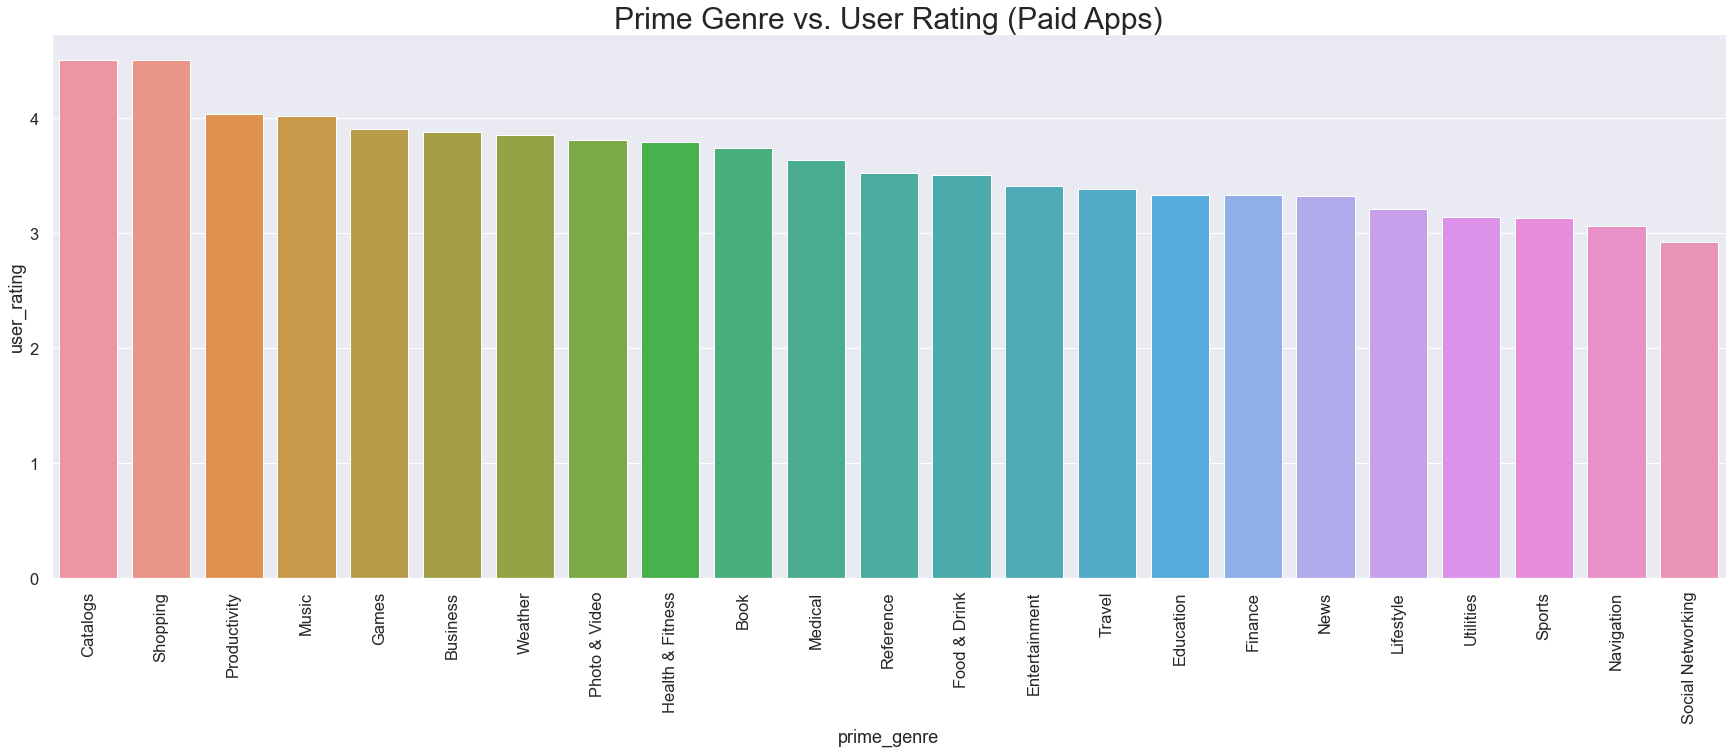

In [47]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x="prime_genre", y="user_rating", data=df_genre_vs_rating_notfree)
plt.title("Prime Genre vs. User Rating (Paid Apps)", size=30)

Text(0.5, 1.0, 'Prime Genre vs. User Rating (Free and Paid Apps)')

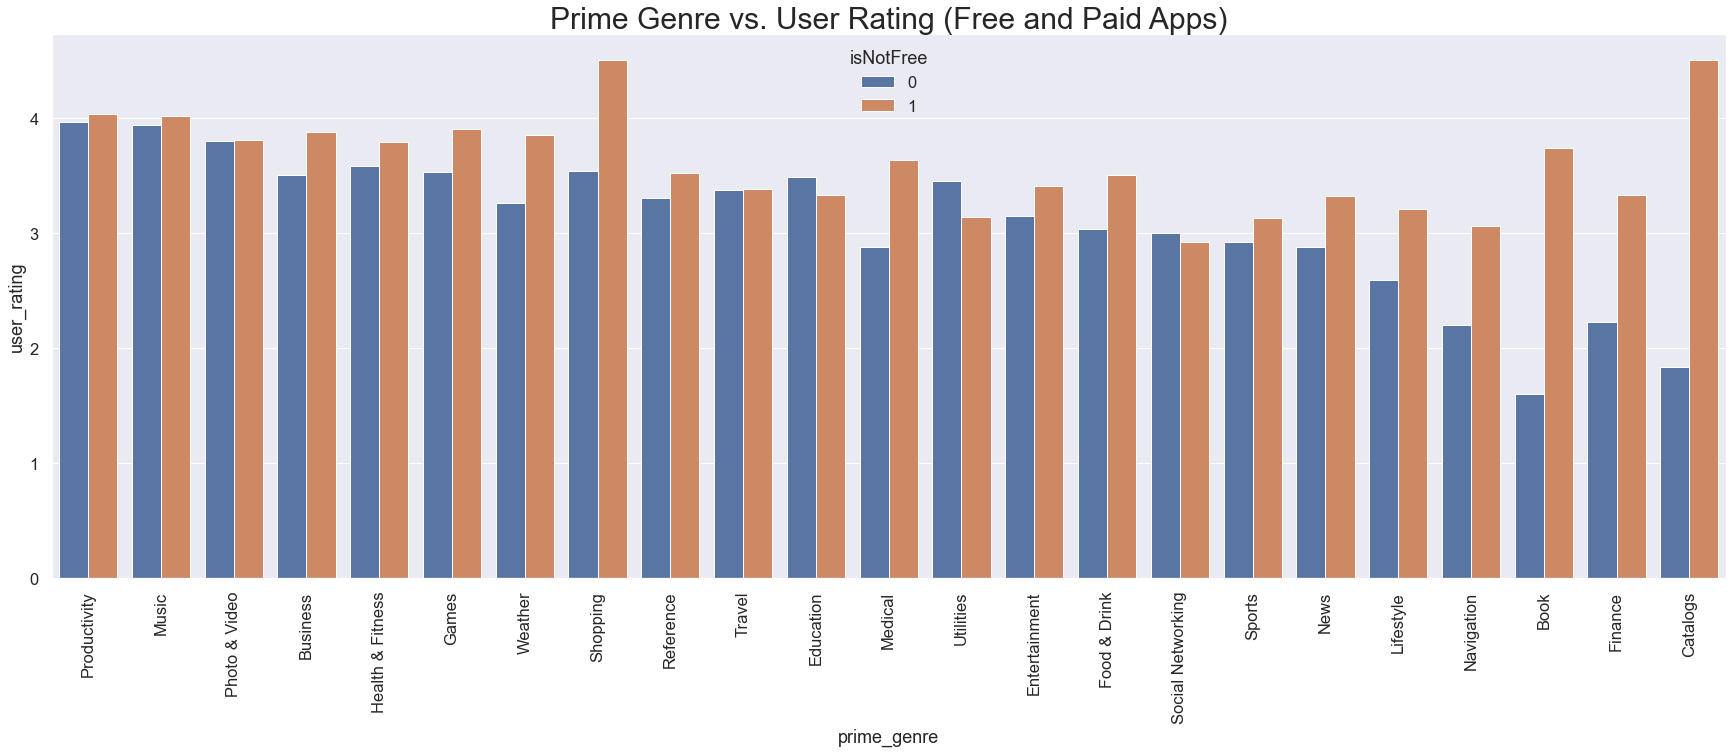

In [48]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x="prime_genre", y="user_rating", hue="isNotFree", data=df_app, ci=None, \
            order=df_app[['prime_genre', 'user_rating']].groupby('prime_genre').mean()\
            ['user_rating'].sort_values(ascending=False).index)
plt.title("Prime Genre vs. User Rating (Free and Paid Apps)", size=30)

- In general apps have much higher ratings when they are paid
- Navigation, Book, Finance, and Catalogs have much higher ratings when they are paid
- Shopping has much higher rating when it is a paid app, however, there is only one paid shopping app is present in our data

## Price vs. User Rating

Text(0.5, 1.0, 'Price (USD) vs. User Rating')

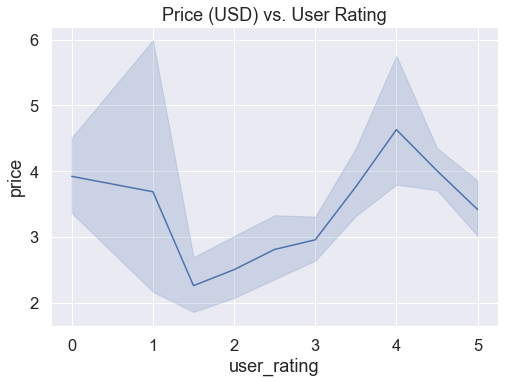

In [49]:
sns.lineplot(data=df_app_notfree, x="user_rating", y="price")
plt.title("Price (USD) vs. User Rating")

- It can be seen that higher price can contribute to higher user_rating, however, when the price is too high, user rating can be low

## Supported Device Number vs User Rating

Text(0.5, 1.0, 'Supported Device Number vs. User Rating')

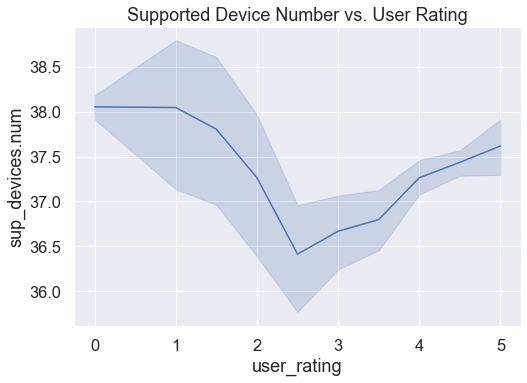

In [50]:
sns.lineplot(data=df_app, x="user_rating", y="sup_devices.num")
plt.title("Supported Device Number vs. User Rating")

- There are no real relationship betweeen supported device number and user rating, however, when supported device number is less than 37, user rating can dropped to somewhere above 2 and below 4.

## Screenshot Number vs. User Rating

Text(0.5, 1.0, 'Screenshot Number vs. User Rating')

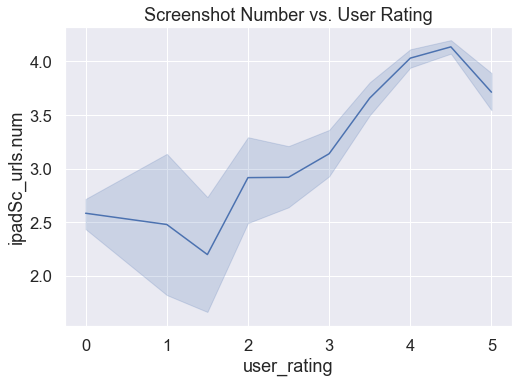

In [51]:
sns.lineplot(data=df_app, x="user_rating", y="ipadSc_urls.num")
plt.title("Screenshot Number vs. User Rating")

- It can be seen that higher screenshot number contribute to higher user ratings
- Keeping screenshots above 3 will make the app to have higher ratings

## Number of Supported Languages vs User Rating

Text(0.5, 1.0, 'Number of Supported Languages vs. User Rating')

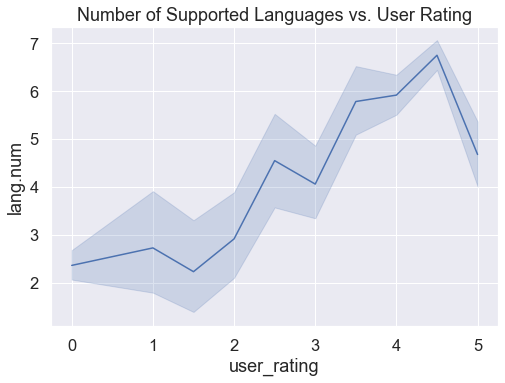

In [52]:
sns.lineplot(data=df_app, x="user_rating", y="lang.num")
plt.title("Number of Supported Languages vs. User Rating")

- It can be seen that in general, higher number of supported languages contribute to higher user ratings.
- Although best apps (5 rated apps) usually have around 4 to 5 languages.
- An app with 6-7 languages are guaranteed to be a good app

## Vpp vs User Rating

In [53]:
df_app[['vpp_lic', 'user_rating']].groupby('vpp_lic').mean()

,user_rating
vpp_lic,
0,2.260000
1,3.535819


Text(0.5, 1.0, 'User Rating vs. Vpp License')

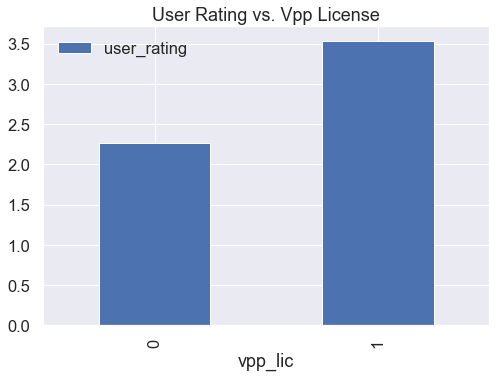

In [54]:
df_app[['vpp_lic', 'user_rating']].groupby('vpp_lic').mean().plot.bar()
plt.title("User Rating vs. Vpp License")

- Apps with Vpp has higher user_rating on average

## Content rating vs rating

In [55]:
df_app['cont_rating'].value_counts()

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

In [56]:
df_app.groupby(['cont_rating'])['user_rating'].mean()

cont_rating
12+    3.566667
17+    2.760450
4+     3.570156
9+     3.769504
Name: user_rating, dtype: float64

In [57]:
df_app.groupby(['cont_rating'])['user_rating'].mean().reset_index().sort_values(by=['user_rating'], ascending=True)

,cont_rating,user_rating
1,17+,2.760450
0,12+,3.566667
2,4+,3.570156
3,9+,3.769504


([<matplotlib.axis.XTick at 0x7f92ea685d90>,
 [Text(0, 0, '17+'), Text(1, 0, '12+'), Text(2, 0, '4+'), Text(3, 0, '9+')])

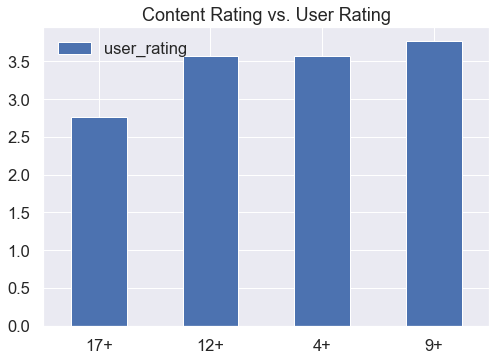

In [58]:
df_app.groupby(['cont_rating'])['user_rating'].mean().reset_index().sort_values(by=['user_rating'], ascending=True).plot.bar()
plt.title('Content Rating vs. User Rating')
X_cont_rating = [0, 1, 2, 3]
values = ['17+','12+', '4+', '9+']
plt.xticks(X_cont_rating, values, rotation=0)

- 17+ content has an average lower user rating compared to the other content rating
- 9+ content has the highest rating among all ages

## App Size vs Rating

Text(0.5, 1.0, 'Size (MB) vs. User Rating for Free and Paid Apps')

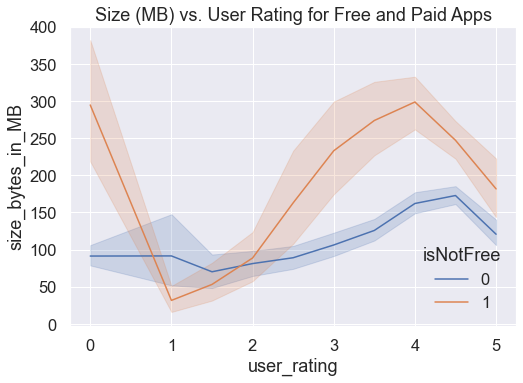

In [59]:
sns.lineplot(data=df_app, x="user_rating", y="size_bytes_in_MB", hue="isNotFree")
plt.title("Size (MB) vs. User Rating for Free and Paid Apps")

- Highest rated paid apps are between 175 MB - 300 MB in size
- Highest rated free apps are between 100 MB - 175 MB in size

Text(0.5, 1.0, 'Distribution Plot of Apps Size (MB)')

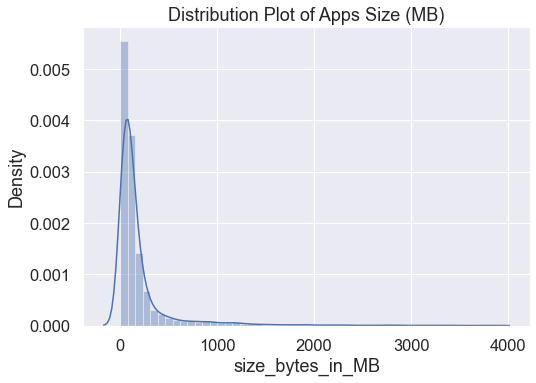

In [60]:
sns.distplot(df_app["size_bytes_in_MB"])
plt.title("Distribution Plot of Apps Size (MB)")

- Right skewed distribution plot
- Most apps are around 190 MB in size

Text(0.5, 1.0, 'Box Plot of Apps Size (MB)')

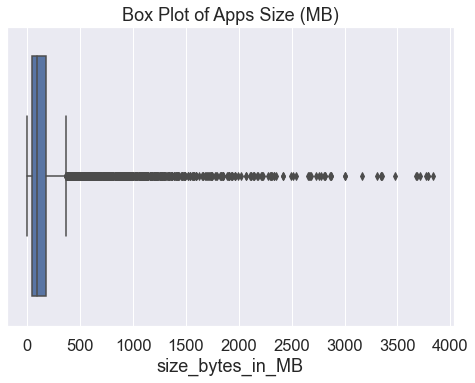

In [61]:
sns.boxplot(df_app["size_bytes_in_MB"])
plt.title("Box Plot of Apps Size (MB)")

In [62]:
df_app["size_bytes_in_MB"].mean()

189.90941412455177

In [63]:
df_app["size_bytes_in_MB"].median()

92.65234375

In [64]:
# Calculate IQR size_bytes_in_MB
Q1 = df_app.describe()["size_bytes_in_MB"]['25%']
Q3 = df_app.describe()["size_bytes_in_MB"]['75%']
IQR = Q3 - Q1
IQR

print("Q1 = {}".format(Q1))
print("Q3 = {}".format(Q3))
print("IQR = {}".format(IQR))

Q1 = 44.7490234375
Q3 = 173.4970703125
IQR = 128.748046875


In [65]:
# Calculate outlier size_bytes_in_MB
lower_inner_fence = Q1 - 1.5 * IQR
print("Lower Inner Fence = {}".format(lower_inner_fence))
upper_inner_fence = Q3 + 1.5 * IQR
print("Upper Inner Fence = {}".format(upper_inner_fence))

Lower Inner Fence = -148.373046875
Upper Inner Fence = 366.619140625


In [66]:
# outliers count
high_outliers_count = df_app[df_app['size_bytes_in_MB'] > upper_inner_fence].count()['size_bytes_in_MB']
print("High Outliers Count = {}".format(high_outliers_count))
low_outliers_count = df_app[df_app['size_bytes_in_MB'] < lower_inner_fence].count()['size_bytes_in_MB']
print("Low Outliers Count = {}".format(low_outliers_count))
outlier_counts = high_outliers_count + low_outliers_count
print("Total Outliers = {}".format(outlier_counts))

High Outliers Count = 778
Low Outliers Count = 0
Total Outliers = 778


In [67]:
percentage_outliers = outlier_counts / df_app['size_bytes_in_MB'].count() * 100
percentage_outliers

10.810059747116854

- Most apps are around 190 MB in size
- Apps above 366.6 MB's are upper inner fence outliers
- 10.8% of the data are outliers

In [68]:
df_app['currency'].value_counts() # all currency is in USD

USD    7197
Name: currency, dtype: int64

In [69]:
df_app_notfree["price"].mean()

3.955297675899396

Text(0.5, 1.0, 'Distribution Plot of Apps Price (USD)')

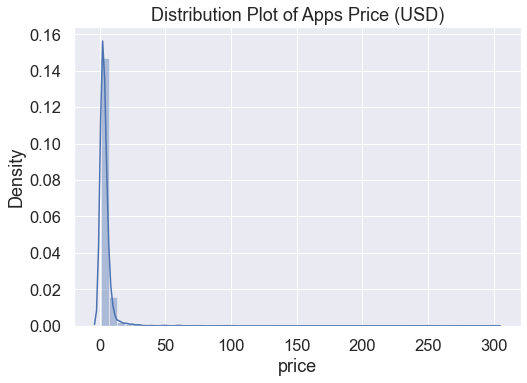

In [70]:
sns.distplot(df_app_notfree["price"])
plt.title("Distribution Plot of Apps Price (USD)")

- The distribution plot for price is right skewed
- Apps are mostly priced at around $4

Text(0.5, 1.0, 'Box Plot of Apps Price (USD)')

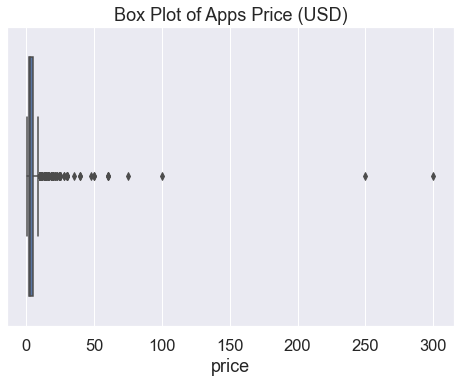

In [71]:
sns.boxplot(df_app_notfree["price"])
plt.title("Box Plot of Apps Price (USD)")

In [72]:
df_app_notfree["price"].mean()

3.955297675899396

In [73]:
df_app_notfree["price"].median()

2.99

In [74]:
# Calculate IQR size_bytes_in_MB
Q1 = df_app.describe()["price"]['25%']
Q3 = df_app.describe()["price"]['75%']
IQR = Q3 - Q1
IQR

print("Q1 = {}".format(Q1))
print("Q3 = {}".format(Q3))
print("IQR = {}".format(IQR))

Q1 = 0.0
Q3 = 1.99
IQR = 1.99


In [75]:
# Calculate outlier size_bytes_in_MB
lower_inner_fence = Q1 - 1.5 * IQR
print("Lower Inner Fence = {}".format(lower_inner_fence))
upper_inner_fence = Q3 + 1.5 * IQR
print("Upper Inner Fence = {}".format(upper_inner_fence))

Lower Inner Fence = -2.985
Upper Inner Fence = 4.975


In [76]:
# outliers count
high_outliers_count = df_app[df_app['price'] > upper_inner_fence].count()['price']
print("High Outliers Count = {}".format(high_outliers_count))
low_outliers_count = df_app[df_app['price'] < lower_inner_fence].count()['price']
print("Low Outliers Count = {}".format(low_outliers_count))
outlier_counts = high_outliers_count + low_outliers_count
print("Total Outliers = {}".format(outlier_counts))

High Outliers Count = 832
Low Outliers Count = 0
Total Outliers = 832


In [77]:
percentage_outliers = outlier_counts / df_app['size_bytes_in_MB'].count() * 100
percentage_outliers

11.560372377379464

- Apps priced above $4.975 are upper fence outliers
- 11.5% of the data are outliers

## Prime Genre vs Success

Text(0.5, 1.0, 'Prime Genre vs. Success')

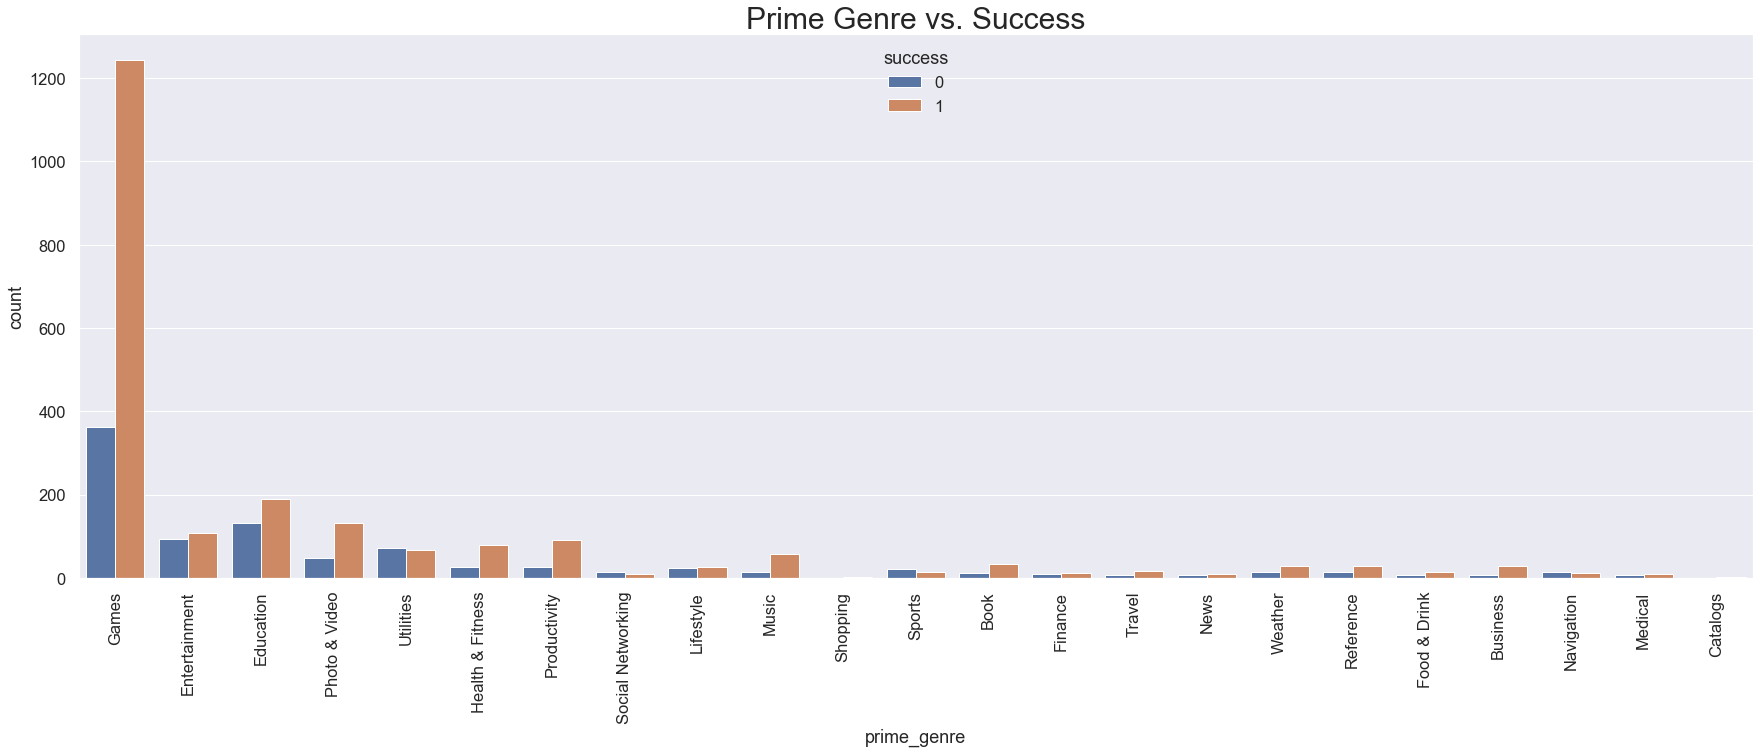

In [78]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.countplot(data=df_app_notfree, x="prime_genre", hue="success", order=df_app["prime_genre"].value_counts().index)
plt.title("Prime Genre vs. Success", size=30)

- Games, Education, Photo & Video, Health & Fitness, Productivity and Music are most likely to be a successful app
- Book, Travel, Weather, Reference, Food & Drink and Business apps are also most likely to be a successful app despite having a niche market on the app store

Text(0.5, 1.0, 'Correlation Heatmap of the Dataset')

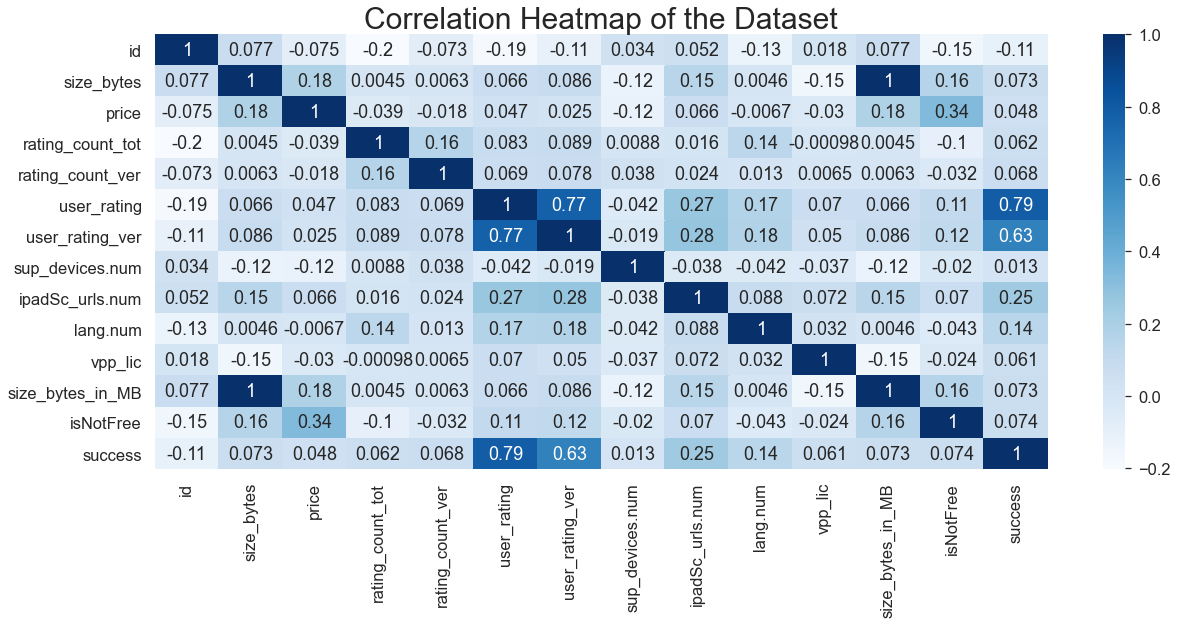

In [79]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_app.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of the Dataset", size=30)

- None of the features are highly correlated except for similar feature attributes

In [80]:
df_app.corr()['success'].sort_values(ascending=False)

success             1.000000
user_rating         0.791901
user_rating_ver     0.627200
ipadSc_urls.num     0.248079
lang.num            0.144189
isNotFree           0.073816
size_bytes_in_MB    0.072963
size_bytes          0.072963
rating_count_ver    0.068054
rating_count_tot    0.062221
vpp_lic             0.060983
price               0.047866
sup_devices.num     0.012687
id                 -0.106701
Name: success, dtype: float64

### Most popular apps

In [81]:
df_app.sort_values(by=['rating_count_tot'], ascending=False)[:10]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree,success
16,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1,Keeping up with friends is faster than ever. \...,371.818359,0,0
519,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1,Instagram is a simple way to capture and share...,108.675781,0,1
1346,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1,Join millions of players worldwide as you buil...,111.081055,0,1
707,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1,"""In pretty much every treasure hunting adventu...",62.867188,0,1
7,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,Find the music you love and let the music you ...,124.208984,0,1
755,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1,Pinterest is the world’s catalog of ideas. Fin...,71.314453,0,1
4,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562,0,1
1493,553834731,Candy Crush Saga,222846976,USD,0.0,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1,"Candy Crush Saga, from the makers of Candy Cru...",212.523438,0,1
178,324684580,Spotify Music,132510720,USD,0.0,878563,8253,4.5,4.5,8.4.3,12+,Music,37,5,18,1,Spotify is the best way to listen to music on ...,126.372070,0,1
275,343200656,Angry Birds,175966208,USD,0.0,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1,Use the unique powers of the Angry Birds to de...,167.814453,0,1


In [82]:
df_app["rating_count_tot"].min()

0

In [83]:
df_app["rating_count_tot"].max()

2974676

In [84]:
df_app["rating_count_tot"].mean()

12892.907183548701

In [85]:
df_app["rating_count_tot"].median()

300.0

Text(0.5, 1.0, 'Distribution Plot of Apps Rating Count')

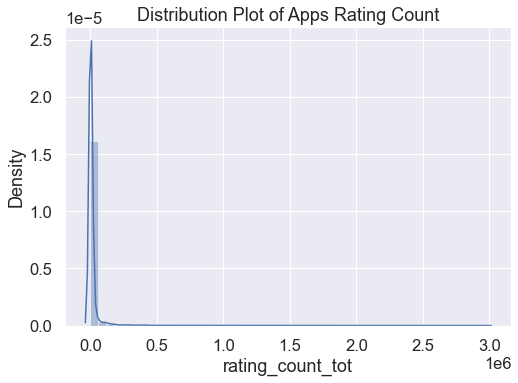

In [86]:
sns.distplot(df_app["rating_count_tot"])
plt.title("Distribution Plot of Apps Rating Count")

- Apps rating distribution plot is heavily right skewed.
- Most apps are rated at around 12900 times on average.
- Facebook is the most highly rated app (Rated at approximately 3 million times).

Text(0.5, 1.0, 'Box Plot of Apps Rating Count')

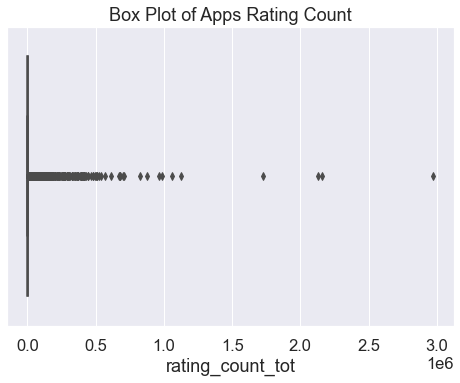

In [87]:
sns.boxplot(df_app["rating_count_tot"])
plt.title("Box Plot of Apps Rating Count")

In [88]:
# Calculate IQR rating_count_tot
Q1 = df_app.describe()["rating_count_tot"]['25%']
Q3 = df_app.describe()["rating_count_tot"]['75%']
IQR = Q3 - Q1
IQR

print("Q1 = {}".format(Q1))
print("Q3 = {}".format(Q3))
print("IQR = {}".format(IQR))

Q1 = 28.0
Q3 = 2793.0
IQR = 2765.0


In [89]:
# Calculate outlier rating_count_tot
lower_inner_fence = Q1 - 1.5 * IQR
print("Lower Inner Fence = {}".format(lower_inner_fence))
upper_inner_fence = Q3 + 1.5 * IQR
print("Upper Inner Fence = {}".format(upper_inner_fence))

Lower Inner Fence = -4119.5
Upper Inner Fence = 6940.5


In [90]:
# outliers count
high_outliers_count = df_app[df_app['rating_count_tot'] > upper_inner_fence].count()['rating_count_tot']
print("High Outliers Count = {}".format(high_outliers_count))
low_outliers_count = df_app[df_app['rating_count_tot'] < lower_inner_fence].count()['rating_count_tot']
print("Low Outliers Count = {}".format(low_outliers_count))
outlier_counts = high_outliers_count + low_outliers_count
print("Total Outliers = {}".format(outlier_counts))

High Outliers Count = 1231
Low Outliers Count = 0
Total Outliers = 1231


In [91]:
percentage_outliers = outlier_counts / df_app['rating_count_tot'].count() * 100
percentage_outliers

17.104349034319853

- Apps above 6940 rating counts are outliers
- 17.1% of the data are outliers

## What should a company do to boost user ratings by looking at app details?


### Advice on Genre

1. Companies should focus on producing Productivity, Music, and Photo & Video Apps if they want to cater customers interest on apps (Good Ratings).

2. For a higher chance of success (User ratings above 4 (included)) companies should look to create Games, Education, Photo & Video, Health & Fitness, Productivity and Music Apps.

3. Companies should produce Catalogs, Productivity, Music, and Games app if they want to produce paid apps.


4. Companies should produce Productivity, Music, Music, and Photo & Video app if they want to produce free apps.


5. For popularity companies can look to produce for Social Networking, Photo & Video, Games, Music, or Reference apps.


###  Advice on App Details (For Good User Ratings)

1. Companies should keep free apps less than 175 MB and paid apps less than 300 MB.

2. Companies can avoid creating 17+ content to avoid lower ratings.

3. In general, paid apps always has better rating than free app.

4. Higher price usually contribute to higher user ratings, however, when price is too high, user ratings can be low.

5. Have at least 37 number of supported devices.

6. Have at least 4 screenshots of your app to be displayed.

7. Support at least 4-5 languages.

8. Having Vpp license is a good deal.

## Feature Engineering

In [92]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree,success
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141,1,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.232422,0,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.867188,0,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.558594,0,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.476562,0,1


In [93]:
df_app['success'].value_counts() # imbalance dataset

1    4781
0    2416
Name: success, dtype: int64

### Feature that will be used
- size_bytes_in_MB
- isNotFree
- price
- sup_devices.num
- ipadSc_urls.num
- lang.num
- vpp_lic
- prime_genre

In [94]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
 16  app_desc          7197 non-null   object 


In [95]:
df_app['prime_genre'].value_counts() # binary encoder

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [96]:
transformer = ColumnTransformer([
    ('binary', ce.BinaryEncoder(), ['prime_genre']),
    ('onehot', OneHotEncoder(), ['cont_rating'])
], remainder = 'passthrough')

In [97]:
transformer.fit_transform(df_app) # test transformer

array([[0, 0, 0, ..., 96.119140625, 1, 1],
       [0, 0, 0, ..., 151.232421875, 0, 1],
       [0, 0, 0, ..., 95.8671875, 0, 0],
       ...,
       [0, 0, 1, ..., 106.1650390625, 1, 1],
       [0, 0, 0, ..., 92.7314453125, 0, 1],
       [0, 0, 0, ..., 86.6875, 0, 1]], dtype=object)

## Train-test split

In [98]:
X = df_app[['size_bytes_in_MB', 'isNotFree', 'price', 'sup_devices.num', 'ipadSc_urls.num', \
           'lang.num', 'vpp_lic', 'prime_genre', 'cont_rating']]
y = df_app['success']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y,
    test_size=0.2, 
    random_state=2020
)

- We want to minimalise fp where we predict it is going to be successful (1), but is not succesful (0)
- Therefore we use precision

In [100]:
def evaluate(models, scoring_method):
    model_names = []
    scores = []
    std_devs = []
    for name, model in models:
        estimator = Pipeline([
            ('transformer', transformer),
            ('model', model)
        ])
        skfold = StratifiedKFold(n_splits=5)
        score = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).mean()
        std = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).std()
        scores.append(score)
        std_devs.append(std)
        model_names.append(name)
        
    return pd.DataFrame({'Models': model_names, 'Cross Val Scores:': scores, 'Std Deviations': std_devs})

In [101]:
models = [
    ['Log Regression', LogisticRegression(solver='liblinear')],
    ['DecisionTree', DecisionTreeClassifier()],
    ['KNeighbours', KNeighborsClassifier(n_neighbors = 2)],
    ['RandomForest', RandomForestClassifier()]
]

In [102]:
evaluate(models, 'precision')

,Models,Cross Val Scores:,Std Deviations
0,Log Regression,0.718367,0.003750
1,DecisionTree,0.730977,0.007629
2,KNeighbours,0.742750,0.017930
3,RandomForest,0.743672,0.009551


In [143]:
def evaluate_scale(models, scoring_method):
    model_names = []
    scores = []
    std_devs = []
    for name, model in models:
        estimator = Pipeline([
            ('transformer', transformer),
            ('preprocess', MinMaxScaler()),
            ('model', model)
        ])
        skfold = StratifiedKFold(n_splits=5)
        score = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).mean()
        std = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).std()
        scores.append(score)
        std_devs.append(std)
        model_names.append(name)
        
    return pd.DataFrame({'Models': model_names, 'Cross Val Scores:': scores, 'Std Deviations': std_devs})

In [144]:
evaluate_scale(models, 'precision')

,Models,Cross Val Scores:,Std Deviations
0,Log Regression,0.718315,0.004133
1,DecisionTree,0.729197,0.008596
2,KNeighbours,0.775250,0.012924
3,RandomForest,0.744159,0.006137


In [145]:
def evaluate_scale_robust(models, scoring_method):
    model_names = []
    scores = []
    std_devs = []
    for name, model in models:
        estimator = Pipeline([
            ('transformer', transformer),
            ('preprocess', RobustScaler()),
            ('model', model)
        ])
        skfold = StratifiedKFold(n_splits=5)
        score = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).mean()
        std = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).std()
        scores.append(score)
        std_devs.append(std)
        model_names.append(name)
        
    return pd.DataFrame({'Models': model_names, 'Cross Val Scores:': scores, 'Std Deviations': std_devs})

In [147]:
evaluate_scale_robust(models, 'precision')

,Models,Cross Val Scores:,Std Deviations
0,Log Regression,0.718137,0.003294
1,DecisionTree,0.728667,0.005085
2,KNeighbours,0.770305,0.013043
3,RandomForest,0.744481,0.010712


In [148]:
from imblearn.pipeline import Pipeline

In [149]:
def evaluate_scale_smote(models, scoring_method):
    model_names = []
    scores = []
    std_devs = []
    for name, model in models:
        smote = SMOTE(random_state=1899)
        estimator = Pipeline([
            ('transformer', transformer),
            ('scaler', MinMaxScaler()),
            ('balancing', smote),
            ('model', model)
        ])
        skfold = StratifiedKFold(n_splits=5)
        score = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).mean()
        std = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).std()
        scores.append(score)
        std_devs.append(std)
        model_names.append(name)
        
    return pd.DataFrame({'Models': model_names, 'Cross Val Scores:': scores, 'Std Deviations': std_devs})

In [150]:
evaluate_scale_smote(models, 'precision')

,Models,Cross Val Scores:,Std Deviations
0,Log Regression,0.774472,0.014053
1,DecisionTree,0.724089,0.013069
2,KNeighbours,0.779109,0.009821
3,RandomForest,0.757013,0.013321


In [151]:
def evaluate_scale_nearmiss(models, scoring_method):
    model_names = []
    scores = []
    std_devs = []
    for name, model in models:
        nearmiss = NearMiss()
        estimator = Pipeline([
            ('transformer', transformer),
            ('scaler', MinMaxScaler()),
            ('balancing', nearmiss),
            ('model', model)
        ])
        skfold = StratifiedKFold(n_splits=5)
        score = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).mean()
        std = cross_val_score(estimator, X_train, y_train, scoring=scoring_method, cv=skfold).std()
        scores.append(score)
        std_devs.append(std)
        model_names.append(name)
        
    return pd.DataFrame({'Models': model_names, 'Cross Val Scores:': scores, 'Std Deviations': std_devs})

In [152]:
evaluate_scale_nearmiss(models, 'precision')

,Models,Cross Val Scores:,Std Deviations
0,Log Regression,0.757666,0.020635
1,DecisionTree,0.733307,0.021863
2,KNeighbours,0.785803,0.012848
3,RandomForest,0.767165,0.022361


## Precision Scores

### Knn without Scaler

In [153]:
model= KNeighborsClassifier(n_neighbors = 2)

estimator = Pipeline([
    ('transformer', transformer),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7724719101123596

### Knn with MinMaxScaler()

In [154]:
model= KNeighborsClassifier(n_neighbors = 2)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7764060356652949

- We achieve 1% higher precision score with scaler

### Knn with RobustScaler()

In [157]:
model= KNeighborsClassifier(n_neighbors = 2)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', RobustScaler()),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7720994475138122

### Knn with StandardScaler()

In [158]:
model= KNeighborsClassifier(n_neighbors = 2)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', StandardScaler()),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.768361581920904

### Logistic Regression with MinMaxScaler() + SMOTE()

In [159]:
model= LogisticRegression(solver = "liblinear")
smote = SMOTE(random_state=1899)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('balancing', smote),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.782258064516129

### Random Forest with MinMaxScaler() + SMOTE

In [183]:
model= RandomForestClassifier()
smote = SMOTE(random_state=1899)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('balancing', smote),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7712765957446809

### Knn with MinMaxScaler() + SMOTE

In [367]:
model = KNeighborsClassifier(n_neighbors = 10)
smote = SMOTE(random_state=1899)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('balancing', smote),
    ('model', model)])

estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.804630969609262

### Knn with MinMaxScaler() + Nearmiss()

In [249]:
model = KNeighborsClassifier(n_neighbors = 2)
nearmiss = NearMiss()

estimator_nearmiss = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('balancing', nearmiss),
    ('model', model)])

estimator_nearmiss.fit(X_train,y_train)
precision_score(y_test,estimator_nearmiss.predict(X_test))

0.774818401937046

- Best Model is Knn with MinMaxScaler() and SMOTE()

### Knn with StandardScaler() + SMOTE()

In [245]:
model= KNeighborsClassifier(n_neighbors = 2)
nearmiss = NearMiss()

estimator_standard = Pipeline([
    ('transformer', transformer),
    ('scaler', StandardScaler()),
    ('balancing', nearmiss),
    ('model', model)])

estimator_standard.fit(X_train,y_train)
precision_score(y_test,estimator_standard.predict(X_test))

0.7547619047619047

### Knn with RobustScaler() + SMOTE()

In [246]:
model= KNeighborsClassifier(n_neighbors = 2)
smote = SMOTE(random_state=1899)

estimator_robust = Pipeline([
    ('transformer', transformer),
    ('scaler', RobustScaler()),
    ('balancing', smote),
    ('model', model)])

estimator_robust.fit(X_train,y_train)
precision_score(y_test,estimator_robust.predict(X_test))

0.783987915407855

- RobustScaler() precision score is higher than using MinMaxScaler().
- RobustScaler(): 0.784 while MinMaxScaler() is 0.783, however with RobustScaler(), the prediction shows weird result compared with the EDA that was previously performed, therefore we prefer to choose MinMaxScaler() as MinMaxScaler() is best suited with knn.
- The reason for this might be because RobustScaler() is not sensitive to outliers and MinMaxScaler() is better suited for knn.

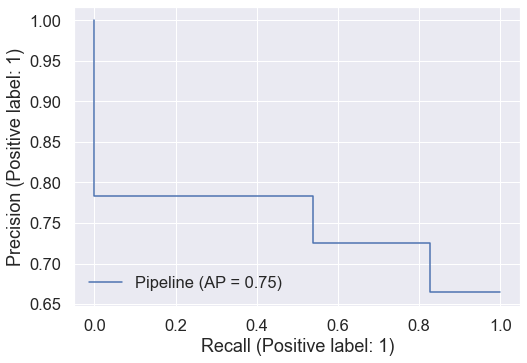

In [357]:
plot_precision_recall_curve(estimator,X_test,y_test)

### Hyperparameter Tuning

In [358]:
hyperparam_space = {
    'model__p': [1,2],
    'model__leaf_size': [5, 10, 30, 35],
    'model__n_neighbors': [2, 4, 6, 8, 10],
    'model__weights': ['uniform', 'distance']
}

In [359]:
model= KNeighborsClassifier(n_neighbors = 2)
smote = SMOTE(random_state=1899)

estimator = Pipeline([
    ('transformer', transformer),
    ('scaler', MinMaxScaler()),
    ('balancing', smote),
    ('model', model)]
)

skfold = StratifiedKFold(n_splits=5)
grid_search= GridSearchCV(estimator,param_grid=hyperparam_space,cv=skfold,scoring='precision',n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['prime_genre']),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         ['cont_rating'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('balancing', SMOTE(random_state=1899)),
                                       ('model',
                                        KNeighborsClassi

In [360]:
estimator.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('binary', BinaryEncoder(), ['prime_genre']),
                                   ('onehot', OneHotEncoder(), ['cont_rating'])])),
  ('scaler', MinMaxScaler()),
  ('balancing', SMOTE(random_state=1899)),
  ('model', KNeighborsClassifier(n_neighbors=2))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('binary', BinaryEncoder(), ['prime_genre']),
                                 ('onehot', OneHotEncoder(), ['cont_rating'])]),
 'scaler': MinMaxScaler(),
 'balancing': SMOTE(random_state=1899),
 'model': KNeighborsClassifier(n_neighbors=2),
 'transformer__n_jobs': None,
 'transformer__remainder': 'passthrough',
 'transformer__sparse_threshold': 0.3,
 'transformer__transformer_weights': None,
 'transformer__transformers': [('binary', BinaryEncoder(), ['prime_genre']),
  ('onehot', OneHotEncoder(), ['cont_r

In [361]:
grid_search.best_params_

{'model__leaf_size': 5,
 'model__n_neighbors': 10,
 'model__p': 2,
 'model__weights': 'uniform'}

In [362]:
grid_search.best_score_

0.7865579262908114

In [363]:
grid_search.best_estimator_.fit(X_train,y_train)
precision_score(y_test,grid_search.best_estimator_.predict(X_test))

0.804630969609262

### Before Tuning

In [364]:
estimator.fit(X_train,y_train)
precision_score(y_test,estimator.predict(X_test))

0.7830045523520486

In [365]:
print(classification_report(y_test,estimator.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      0.70      0.54       483
           1       0.78      0.54      0.64       957

    accuracy                           0.59      1440
   macro avg       0.61      0.62      0.59      1440
weighted avg       0.67      0.59      0.60      1440



### After Tuning

In [366]:
grid_search.fit(X_train,y_train)
precision_score(y_test,grid_search.best_estimator_.predict(X_test))

0.804630969609262

In [368]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.46      0.72      0.56       483
           1       0.80      0.58      0.67       957

    accuracy                           0.63      1440
   macro avg       0.63      0.65      0.62      1440
weighted avg       0.69      0.63      0.64      1440



- Precision score is improved after hyperparameter tuning
- Model is improved with SMOTE() and MinMaxScaler()
- Higher precision score is achieved with:
    - 'model__leaf_size': 5
    - 'model__n_neighbors': 10
    - 'model__p': 2
    - 'model__weights': 'uniform'

### Precision Recall Curve After Tuning

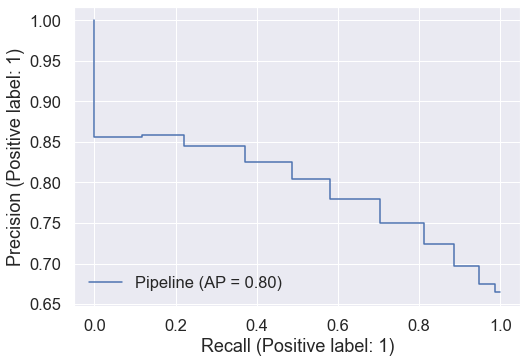

In [369]:
plot_precision_recall_curve(grid_search.best_estimator_,X_test,y_test)

## Saving Model

In [370]:
#Saving models
import pickle
import joblib

### With Pickle

In [371]:
grid_search.best_estimator_.fit(X,y)

file_name = 'Mobile App Store Model.sav'

pickle.dump(grid_search.best_estimator_, open(file_name,'wb'))

### Predict with Saved Model

In [372]:
loaded_model = pickle.load(open(file_name, 'rb'))

In [373]:
loaded_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0])

In [374]:
# X = df_app[['size_bytes_in_MB', 'isNotFree', 'price', 'sup_devices.num', 'ipadSc_urls.num', \
#            'lang.num', 'vpp_lic', 'prime_genre', 'cont_rating']]

## Games

In [375]:
pacman = pd.DataFrame({
    'size_bytes_in_MB':[100],
    'isNotFree':[1],
    'price': [2.99],
    'sup_devices.num':[30],
    'ipadSc_urls.num':[5],
    'lang.num' : [10],
    'vpp_lic' : [1],
    'prime_genre': ['Games'],
    'cont_rating': '4+'
})
pacman

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre,cont_rating
0,100,1,2.99,30,5,10,1,Games,4+


In [376]:
loaded_model.predict(pacman)

array([1])

In [377]:
loaded_model.predict_proba(pacman)

array([[0.4, 0.6]])

In [378]:
# Mean user rating of paid games
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Games')]['user_rating'].mean()

3.9049844236760123

In [379]:
# Mean success of paid games
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Games')]['success'].mean()

0.7744548286604361

- Paid games must have at least 10 supported languages to be successful
- Free games only need 1 supported languages to be successful

In [539]:
flappy = pd.DataFrame({
    'size_bytes_in_MB':[40],
    'isNotFree':[0],
    'price': [0],
    'sup_devices.num':[30],
    'ipadSc_urls.num':[5],
    'lang.num' : [1],
    'vpp_lic' : [1],
    'prime_genre': ['Games'],
    'cont_rating': '4+'
})
flappy

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre,cont_rating
0,40,0,0,30,5,1,1,Games,4+


In [540]:
loaded_model.predict(flappy)

array([1])

In [541]:
loaded_model.predict_proba(flappy)

array([[0.2, 0.8]])

In [542]:
# Mean user rating of free games
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Games')]['user_rating'].mean()

3.5285777580859548

In [543]:
# Mean success of free games
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Games')]['success'].mean()

0.7199822773593265

## Shopping

In [385]:
blablashop = pd.DataFrame({
    'size_bytes_in_MB':[100],
    'isNotFree':[0],
    'price': [0],
    'sup_devices.num':[37],
    'ipadSc_urls.num':[7],
    'lang.num' : [9],
    'vpp_lic' : [1],
    'prime_genre': ['Shopping'],
    'cont_rating': '12+'
})
blablashop

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre,cont_rating
0,100,0,0,37,7,9,1,Shopping,12+


In [386]:
loaded_model.predict(blablashop)

array([1])

In [387]:
loaded_model.predict_proba(blablashop)

array([[0.1, 0.9]])

In [388]:
# Mean user rating of free shopping app
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping')]['user_rating'].mean()

3.5330578512396693

In [389]:
# Mean success of free shopping app
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Shopping')]['success'].mean()

0.628099173553719

## Navigation

In [509]:
free_navigation_app = pd.DataFrame({
    'size_bytes_in_MB':[100],
    'isNotFree':[0],
    'price': [0],
    'sup_devices.num':[37],
    'ipadSc_urls.num':[7],
    'lang.num' : [9],
    'vpp_lic' : [1],
    'prime_genre': ['Navigation'],
    'cont_rating': '4+'
})
free_navigation_app

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre,cont_rating
0,100,0,0,37,7,9,1,Navigation,4+


In [510]:
df_app[(df_app['prime_genre'] == 'Navigation') & (df_app['isNotFree'] == 0)]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree,success
174,323229106,"Waze - GPS Navigation, Maps & Real-time Traffic",94139392,USD,0.0,345046,3040,4.5,4.5,4.24,4+,Navigation,37,5,36,1,Join 80 million drivers who save time & money ...,89.778320,0,1
200,329541503,Geocaching®,108166144,USD,0.0,12811,134,3.5,1.5,5.3,4+,Navigation,37,0,22,1,Join the world’s largest treasure hunting comm...,103.155273,0,0
280,344176018,ImmobilienScout24: Real Estate Search in Germany,126867456,USD,0.0,187,0,3.5,0.0,9.5,4+,Navigation,37,5,3,1,ImmobilienScout24 – The app with the largest r...,120.990234,0,0
441,377321278,恵方コンパス.,41207059,USD,0.0,0,0,0.0,0.0,2.1.0,4+,Navigation,39,5,1,1,恵方とは：\n方位神の一つで、その年の福徳を司る吉神である歳徳神(としとくじん)の方位を恵方...,39.298114,0,0
669,413487517,ナビタイム ドライブサポーター - NAVITIMEのカーナビアプリ,125665280,USD,0.0,0,0,0.0,0.0,4.28.0,4+,Navigation,37,5,1,1,The language in the application supports only ...,119.843750,0,0
870,447024088,自転車ナビ by NAVITIME(ナビタイム) - 自転車のナビができるアプリ,48708608,USD,0.0,0,0,0.0,0.0,4.11.1,4+,Navigation,37,0,1,1,The language in the application supports only ...,46.452148,0,0
897,452186370,百度地图-智能的手机导航，公交地铁出行必备,213586944,USD,0.0,1014,23,4.0,4.5,9.8.2,17+,Navigation,37,0,2,1,【功能介绍】\n- 专业手机地图，智能导航躲避拥堵，大数据运算推荐路线。\n- 明星导航语音...,203.692383,0,1
948,461703208,高德地图（精准专业的手机地图）,166025216,USD,0.0,1040,5,4.5,4.0,8.0.8,4+,Navigation,38,0,1,1,高德地图--中国专业的手机地图，超过7亿用户正在使用！\n高德是苹果中国地图数据独家供应商，...,158.333984,0,1
959,463431091,Railway Route Search,46950400,USD,0.0,5,0,3.0,0.0,3.17.1,4+,Navigation,37,0,1,1,The “Railway Route Search” is a route search a...,44.775391,0,0
1203,504677517,CoPilot GPS – Car Navigation & Offline Maps,82534400,USD,0.0,3582,70,4.0,3.5,10.0.0.984,4+,Navigation,38,5,25,1,"Built for you, the driver. CoPilot is always r...",78.710938,0,1


In [511]:
loaded_model.predict(free_navigation_app)

array([0])

In [512]:
loaded_model.predict_proba(free_navigation_app)

array([[0.9, 0.1]])

In [513]:
# Mean user rating of free navigation app
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Navigation')]['user_rating'].mean()

2.2

In [514]:
# Mean success of free navigation app
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Navigation')]['success'].mean()

0.35

## Lifestyle

In [520]:
free_lifestyle = pd.DataFrame({
    'size_bytes_in_MB':[200],
    'isNotFree':[0],
    'price': [0],
    'sup_devices.num':[37],
    'ipadSc_urls.num':[9],
    'lang.num' : [9],
    'vpp_lic' : [1],
    'prime_genre': ['Lifestyle'],
    'cont_rating': '4+'
})
free_lifestyle

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre,cont_rating
0,200,0,0,37,9,9,1,Lifestyle,4+


In [521]:
loaded_model.predict(free_lifestyle)

array([0])

In [522]:
loaded_model.predict_proba(free_lifestyle)

array([[0.6, 0.4]])

In [523]:
# Mean user rating of free lifestyle app
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Lifestyle')]['user_rating'].mean()

2.5904255319148937

In [524]:
# Mean success of free lifestyle app
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Lifestyle')]['success'].mean()

0.425531914893617

## Utilities

In [525]:
paid_utilities = pd.DataFrame({
    'size_bytes_in_MB':[43],
    'isNotFree':[1],
    'price': [2.99],
    'sup_devices.num':[37],
    'ipadSc_urls.num':[3],
    'lang.num' : [5],
    'vpp_lic' : [1],
    'prime_genre': ['Lifestyle'],
    'cont_rating': '4+'
})
paid_utilities

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre,cont_rating
0,43,1,2.99,37,3,5,1,Lifestyle,4+


In [475]:
# Mean language number of free utilities app
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Utilities')]['lang.num'].mean()

5.086330935251799

In [476]:
# Mean screenshots of free utilities app
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Utilities')]['ipadSc_urls.num'].mean()

2.949640287769784

In [477]:
# Mean supported device number of free utilities app
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Utilities')]['sup_devices.num'].mean()

36.67625899280576

In [478]:
loaded_model.predict(paid_utilities)

array([0])

In [479]:
loaded_model.predict_proba(paid_utilities)

array([[0.7, 0.3]])

In [480]:
# Mean user rating of free utilities app
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Utilities')]['user_rating'].mean()

3.1402877697841727

In [481]:
# Mean success of free utilities app
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Utilities')]['success'].mean()

0.4892086330935252

In [482]:
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Utilities')]['price'].mean()

2.9396402877697843

In [483]:
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Utilities')]['size_bytes_in_MB'].mean()

42.04251955567504

In [484]:
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Utilities')]['cont_rating'].value_counts()

4+     99
17+    21
12+    12
9+      7
Name: cont_rating, dtype: int64

### Make utilities app better
- Increase number of screenshots (more features)
- Make the app free

In [505]:
paid_utilities_inceased_screenshots = pd.DataFrame({
    'size_bytes_in_MB':[43],
    'isNotFree':[1],
    'price': [2.99],
    'sup_devices.num':[37],
    'ipadSc_urls.num':[5],
    'lang.num' : [5],
    'vpp_lic' : [1],
    'prime_genre': ['Lifestyle'],
    'cont_rating': '4+'
})
paid_utilities_inceased_screenshots

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre,cont_rating
0,43,1,2.99,37,5,5,1,Lifestyle,4+


In [506]:
loaded_model.predict(paid_utilities_inceased_screenshots)

array([1])

In [507]:
free_utilities = pd.DataFrame({
    'size_bytes_in_MB':[43],
    'isNotFree':[0],
    'price': [0],
    'sup_devices.num':[37],
    'ipadSc_urls.num':[3],
    'lang.num' : [5],
    'vpp_lic' : [1],
    'prime_genre': ['Lifestyle'],
    'cont_rating': '4+'
})
free_utilities

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre,cont_rating
0,43,0,0,37,3,5,1,Lifestyle,4+


In [508]:
loaded_model.predict(free_utilities)

array([1])

## Social Network

In [417]:
free_social_network = pd.DataFrame({
    'size_bytes_in_MB':[200],
    'isNotFree':[0],
    'price': [0],
    'sup_devices.num':[37],
    'ipadSc_urls.num':[9],
    'lang.num' : [9],
    'vpp_lic' : [1],
    'prime_genre': ['Social Networking'],
    'cont_rating': '4+'
})
free_social_network

,size_bytes_in_MB,isNotFree,price,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,prime_genre,cont_rating
0,200,0,0,37,9,9,1,Social Networking,4+


In [418]:
loaded_model.predict(free_social_network)

array([0])

In [419]:
loaded_model.predict_proba(free_social_network)

array([[0.6, 0.4]])

In [421]:
# Mean user rating of free social networking app
df_app[(df_app['isNotFree'] == 0) & (df_app['prime_genre'] == 'Social Networking')]['user_rating'].mean()

2.9965034965034967

In [423]:
# Mean user rating of paid free social networking app
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Social Networking')]['success'].mean()

0.4166666666666667

In [435]:
# Mean user rating of paid free social networking app
df_app[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Social Networking')]['cont_rating'].value_counts()

4+     12
17+     7
12+     5
Name: cont_rating, dtype: int64

### With Joblib

In [401]:
# saving model
joblib.dump(grid_search.best_estimator_,'model_mobile_app_store_joblib')

['model_mobile_app_store_joblib']

In [402]:
# load model
model_joblib = joblib.load('model_mobile_app_store_joblib')

In [403]:
# predict
model_joblib.predict(pacman)

array([1])

In [404]:
model_joblib.predict_proba(pacman)

array([[0.4, 0.6]])

### Feedback
- Test predict